In [2]:
import numpy as np
from numpy import array as arr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
x = arr([143.2, 145, 146.5, 148, 149.5, 151, 152.5])
p = arr([1, 9, 29.9, 43, 30.4, 9, 1])
theta = np.arctan((x-x[len(x)//2])/147)
d = arr([(i - 3)*532*1e-9/np.sin(theta[i]) for i in range(len(x))])
d = np.nanmean(d)
k = 2*np.pi/(532*1e-9)
b = 532*1e-9/np.sin(theta[0])
f = lambda N, A, b, x: A**2*(np.sin(N*k*d/2*np.sin(x))*np.sin(k*b/2*np.sin(x))/(k*b/2*np.sin(x)*np.sin(k*d/2*np.sin(x))))**2
fo = lambda A, b, x: A**2*(np.sin(k*b/2*np.sin(x))/(k*b/2*np.sin(x)))**2

/tmp/ipykernel_9832/3480180504.py:4: RuntimeWarning: invalid value encountered in double_scalars
  d = arr([(i - 3)*532*1e-9/np.sin(theta[i]) for i in range(len(x))])


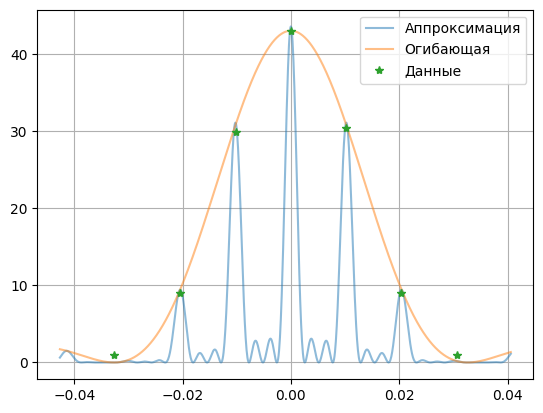

In [4]:
y = np.linspace(np.min(theta)-0.01, np.max(theta)+0.01, 1001)
plt.plot(y, f(4, 1.65, b, y), alpha = 0.5, label = "Аппроксимация")
plt.plot(y, fo(43**0.5, b, y), alpha = 0.5, label = "Огибающая")
plt.plot(theta, p, '*',  label = "Данные")
plt.grid("True")
plt.legend()
plt.savefig("Ex_2/ex_2_1.png")

In [5]:
print("d =", d)
print("b =", -b)

d = 5.160585225121247e-05
b = 1.630118340029333e-05


In [6]:
x = arr([33.5, 107,    141.5, 166.8, 187.3, 207.5, 232.5, 268.5])-187.3
print(x)
p = arr([9.3,  11.66, 13,    26.7,  100,   431,  5.3,   1])
theta = np.arctan((x)/70)
print(theta)
d = arr([(i - 4)*640*1e-9/np.sin(theta[i]) for i in range(len(x))])
d = np.nanmean(d)
print(d)
k = 2*np.pi/(640*1e-9)
f = lambda x, d, g, A, N: A**2*(np.sin(d*k/2*np.cos(g)*(np.sin(x - g) - np.sin(g)))/(d*k/2*np.cos(g)*(np.sin(x - g) - np.sin(g))) * 
                                np.sin(N*d*k/2*np.sin(x))/np.sin(d*k/2*np.sin(x)) )**2

[-153.8  -80.3  -45.8  -20.5    0.    20.2   45.2   81.2]
[-1.14367907 -0.85382079 -0.57938213 -0.2848909   0.          0.28093917
  0.57335651  0.8593372 ]
2.4539608292912136e-06


/tmp/ipykernel_9832/3134210945.py:6: RuntimeWarning: invalid value encountered in double_scalars
  d = arr([(i - 4)*640*1e-9/np.sin(theta[i]) for i in range(len(x))])


0.14046958511032592
2.4539608292912136e-06
0.09046958511032592


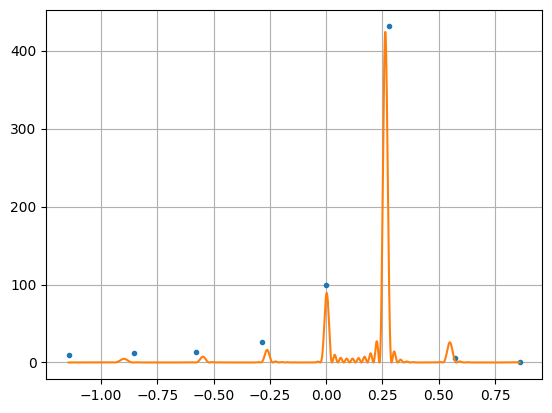

In [7]:
y = np.linspace(np.min(theta), np.max(theta), 10001)
print(theta[-3]/2)
plt.plot(theta, p, '.', label = "Данные")
plt.plot(y, f(y, d, theta[-3]/2-0.05, 2.43, 10), label = "")
plt.grid("True")
print(d)
print(theta[-3]/2-0.05)
plt.savefig("Ex_2/ex_2_approx.png")

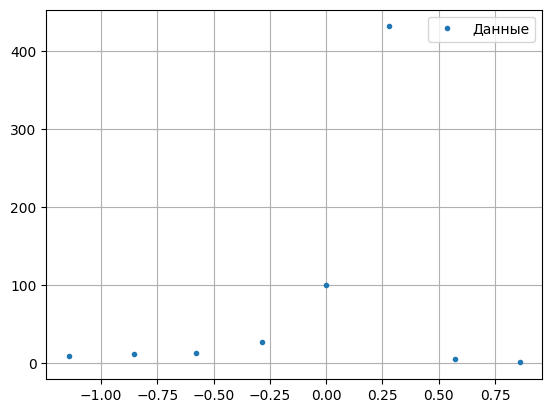

In [8]:
plt.plot(theta, p, '.' ,label = "Данные")
plt.grid("True")
plt.legend()
plt.savefig("Ex_2/ex_2_dat.png")

In [9]:
x = arr([(310 - 248)*0.6 + 258 - 186, 
         315 - 189 - (252 - 189)*0.1, 
         248 + (310 - 248)*0.7 - 124 - (186 - 124)*0.7,
         240 + (340 - 240) * 0.6 - 120 - (180 - 120) * 0.8
         ])*4.5*10**(-5)
b = arr([0, 1, 2, 3]) * 10**(-6)
print(x)
l = 532e-9
k = np.pi * 2 / l

[0.004914  0.0053865 0.00558   0.00594  ]


In [10]:
f = lambda A, b, x: A**2*(np.sin(k*b/2*np.sin(x))/(k*b/2*np.sin(x)))**2
f_min = lambda x, c, y: 532e-9 / (-x/y)/np.sqrt(1 + (x/y)**2) + c


In [11]:
popt, pcov = curve_fit(f_min, x, b)


In [12]:
print(*list(zip(["c = ", "y = "], popt)))


('c = ', 1.7316899652039963e-05) ('y = ', 0.16151723447135966)
